# Lung Cancer Dataset Analysis




# Contributions

Fall 2025 Data Science Project

Hannah Sitther - A, C, F, G - Worked on ANOVA and post hoc testing for alcohol levels vs smoking intensity. Ran a small chi squared test comparing smoking exposure and lung cancer. Wrote analysis and explanations for chosen machine learning technique and possible conclusions about features.

Mihir Kulkarni- A, B, F - Worked on getting the dataset and idea for the project. Prepared the dataset for analysis by using the various preprocessing techniques. Contributed to writing the introduction, conclusion and some analysis in the ML section.

Dakshita Pal - B, C, D, E - Worked on preprocessing the dataset for random forest classification analysis. Worked on the T-Test analysis (Age vs Lung cancer) and Random forest classification. Wrote explanations for exploratory data analysis and Machine learning sections.

Patrick Syme- D,E,F - Worked on implementation of logistic regression algorithm, and visualization of the precision-recall and odds ratio in graph and forest plot.

Ryan Shechtman -  C, D, E, F - Worked on Chi-Squared test and analysis for comparing asbestos exposure and lung cancer. Also worked on the MLP Classifier and contributed to the introduction and analysis in the Machine Learning section.


#Introduction

The main purpose of this project is to analyze and share how different features may increase the chances of lung cancer. This could make it easier for patients to recognize potential risk factors and consult a doctor earlier.

This could also clear any misconceptions people have about causes of cancer; however, we wanted to prioritize identifying patterns that might help researchers or clinicians understand risk factors, before clearing any misconceptions.


Why is it important? According to a study done by UChicago Medicine, the mortality rate for people who are diagnosed with cancer late is significantly higher than the rate for people diagnosed early (Stage 1). By determining what the risk factors are for lung cancer, we can have patients be diagnosed earlier, since both the patients and the doctor will know if a patient is at high risk.
We will use the features that we have in our dataset to provide an analysis on which features have the most likely effect on lung cancer while also providing information on any correlation between the different features for patients to make an informed decision on their self-diagnosis.


# Data Curation
For this tutorial, download this dataset: http://kaggle.com/datasets/mikeytracegod/lung-cancer-risk-dataset

Let us start by setting up the dataset. Once you’ve downloaded the dataset, we will be using the read_csv command to read in the csv file containing the dataset.

Throughout this project, we will be using pandas. Pandas is a Python library that helps us load, analyze and process the data.

In [ ]:
import pandas as pd
df = pd.read_csv('lung_cancer_dataset.csv')
df.head()

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes


As shown above, `df.head()` displays the first five rows of the dataset in a pandas DataFrame, which functions similarly to a spreadsheet in Python.

## Dataset Overview
Our dataset is a health dataset used for understanding how different factors affect lung cancer in patients. The dataset contains 1 identifier (patient_id), 9 features (age, gender, pack_years, radon_exposure, asbestos_exposure, secondhand_smoke_exposure, copd_diagnosis, alcohol_consumption, and family_history), 1 target variable (lung_cancer), and 50,000 entries. Each patient is identified with a unique patient_id and demographic Information, such as age and gender.

The potential risk factors that are being measured are average packs per day throughout the year (pack_years), radon exposure, asbestos exposure, secondhand smoking exposure, diagnosis of chronic obstructive pulmonary disease (COPD), alcohol consumption level, and family history of lung cancer. The variable lung_cancer tells us whether the patient was diagnosed with lung cancer or not, which we can use to determine if a certain risk factor is associated with lung cancer.

There are no overrepresented features; however, the target variable (lung_cancer) is slightly imbalanced, with approximately 69% of patients diagnosed with lung cancer and 31% without.

There are no outliers, because the only variables that could have been outliers are age and pack_years, since those are only numerical data, and they are both evenly distributed with no extreme values.

Now let us study our dataset to see how we can perform analysis and gain useful insight

Let us start by using `df.info`, which gives us useful information on the columns, size and data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 50000 non-null  int64  
 1   age                        50000 non-null  int64  
 2   gender                     50000 non-null  object 
 3   pack_years                 50000 non-null  float64
 4   radon_exposure             50000 non-null  object 
 5   asbestos_exposure          50000 non-null  object 
 6   secondhand_smoke_exposure  50000 non-null  object 
 7   copd_diagnosis             50000 non-null  object 
 8   alcohol_consumption        33338 non-null  object 
 9   family_history             50000 non-null  object 
 10  lung_cancer                50000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.2+ MB


In [ ]:
df.dtypes

,0
patient_id,int64
age,int64
gender,object
pack_years,float64
radon_exposure,object
asbestos_exposure,object
secondhand_smoke_exposure,object
copd_diagnosis,object
alcohol_consumption,object
family_history,object


A lot of the variables we will be working with are categorical as you can see from above

In [ ]:
df.isnull().sum()

,0
patient_id,0
age,0
gender,0
pack_years,0
radon_exposure,0
asbestos_exposure,0
secondhand_smoke_exposure,0
copd_diagnosis,0
alcohol_consumption,16662
family_history,0


There seems to be some mising data that we need to take care of.

## Data Preprocessing

We will now set up the dataset for analysis. First, let's make sure all the categorical data is in binary. This will help with the machine learning analysis since doing machine learning analysis is difficult with text.

So text like 'Yes' and 'No' will be converted to '1' and '0' respectively. We will also fill in the missing values with 'None'.

Also, to add more clarity for our analysis, let us create another feature called 'smoking intensity' that takes the pack_years feature and categorizes it into Heavy, Moderate and light.

In [ ]:
import numpy as np
#Filling in the missing values with None
df['alcohol_consumption'] = df['alcohol_consumption'].fillna('None')

# Let us set up the columns that we need to change to Yes and No
binary_cols = [
    'asbestos_exposure',
    'secondhand_smoke_exposure',
    'copd_diagnosis',
    'family_history',
    'lung_cancer'
]

df[binary_cols] = df[binary_cols].apply(lambda col: col.map({'Yes': 1, 'No': 0}))

# Similar to what we have done previously
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['radon_exposure'] = df['radon_exposure'].map({'High': 2, 'Medium': 1, 'Low': 0})
df['alcohol_consumption'] = df['alcohol_consumption'].map({'Heavy': 2, 'Moderate': 1, 'None': 0})

# Setting up the conditions for the pack years on how intense the smoking levels are
conditions = [
    (df['pack_years'] <= 5),
    (df['pack_years'] > 5) & (df['pack_years'] <= 15),
    (df['pack_years'] > 15)
]

labels = ['Light', 'Moderate', 'Heavy']

#Creating a new columns called smoking intenstiy
df['smoking_intensity'] = np.select(conditions, labels, default='Unknown')
df['smoking_intensity'] = df['smoking_intensity'].map({'Heavy': 2, 'Moderate': 1, 'Light': 0})

df.head()

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer,smoking_intensity
0,100000,69,1,66.025244,2,0,0,1,1,0,0,2
1,100001,32,0,12.780800,2,0,1,1,1,1,1,1
2,100002,89,0,0.408278,1,1,1,1,0,0,1,0
3,100003,78,0,44.065232,0,0,1,0,1,0,1,2
4,100004,38,0,44.432440,1,1,0,1,0,1,1,2


#Exploratory Data Analysis

This is the part where we now perform exploratory data analysis. Our goal is to observe trends using various statistical methods. As we go along we will explain which statistical methods we will be using along with the hypothesis testing.


A p-value quantifies how compatible our data is with the null hypothesis. A small p-value (less than 0.05) suggests the data is unlikely to occur under the null hypothesis, leading us to reject the null in favor of the alternative.

Hypothesis testing allows us to make claims (hypotheses) about our data and test them using different statistical methods. Typically, a null hypothesis and an alternative hypothesis are created. If the resulting p-value after the test is less than 0.05, that means the null hypothesis is rejected

## Statistical method 1: Chi-squared test

The first statistical method we will perform is a Chi-Squared test. We will use Chi-Squared to determine if lung cancer has an effect on Asbestos Exposure. Chi-squared is used to test if categorical variables are independent. In this case, we are testing two categorical variables: asbestos exposure and lung cancer. Our hypothesis:

H0 - Asbestos exposure does not have an effect on lung cancer

HA - Asbestos exposure does have an effect on lung cancer

In [ ]:
# Creating a contingency table to use to perform a chi-squared test on our data
contingency_table = pd.crosstab(df['asbestos_exposure'], df['lung_cancer'])
contingency_table

lung_cancer,0,1
asbestos_exposure,,
0,9689,15462
1,5947,18902


Let us plot this to make it easier for us to visualize the relationship

Matplotlib is a powerful Python library used to create visualizations such as bar charts, scatter plots, and line graphs.

While pandas handles the data, matplotlib handles the plotting.
Together, they make it easy to explore and understand patterns in our dataset.

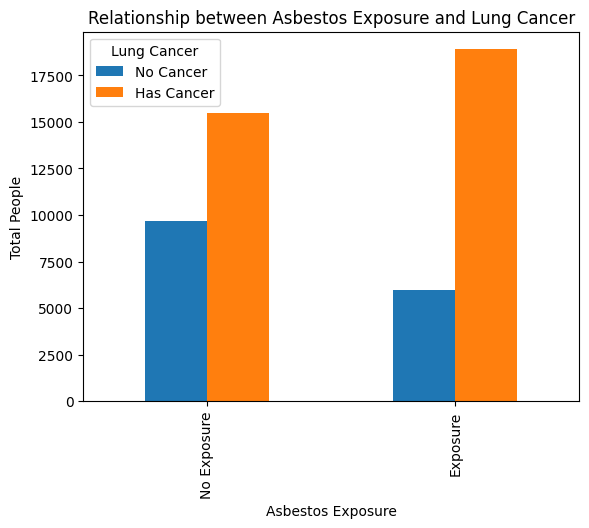

In [ ]:
import matplotlib.pyplot as plt
# Bar graph showing the relationship between asbestos exposure and lung cancer
contingency_table.plot(kind='bar')
plt.xlabel('Asbestos Exposure')
plt.ylabel('Total People')
plt.title('Relationship between Asbestos Exposure and Lung Cancer')
plt.xticks([0, 1], ['No Exposure', 'Exposure'])
plt.legend(title='Lung Cancer', labels= ['No Cancer', 'Has Cancer'])
plt.show()

In [ ]:
import scipy
# Performing the chi-squared test and displaying the p-value
statistic, pvalue, dof, expected_freq = scipy.stats.contingency.chi2_contingency(contingency_table)
print(f'P-value: {float(pvalue)}')

P-value: 4.4611252333742955e-271


## Conclusion 1
We focus on the relationship between the feature Asbestos Exposure and the target variable Lung cancer. Since these are categorical variables, we chose to go with the chi-squared test. We wanted to find out whether being exposed to a form of a toxic mineral has an effect on getting lung cancer. Since our p-value is less than α=.05, we reject the null hypothesis. We have found significant evidence that asbestos exposure does have an effect on lung cancer.
The bar chart supports this result visually: individuals who were exposed to asbestos show substantially higher counts of lung cancer diagnoses compared to those who were not exposed. This finding aligns with known medical research linking asbestos exposure to an increased risk of lung cancer.
Asbestos exposure is a major environmental factor that significantly increases the likelihood of developing lung cancer, indicating that exposure prevention could have meaningful health impacts.

## Statistical method 2: ANOVA


The second statistical method we plan on using is ANOVA. We will use ANOVA to test if there is a difference in smoking levels amongst the different alcohol consumption levels. ANOVA is used because we want to compare the means between 3 or more groups. In this case, it would be the three different levels of alcohol consumption. Our hypotheses are as follows:


HO: There is no difference in average packs per day among the different alcohol consumption levels

HA: There is a difference in average packs per day for at least one alcohol consumption level


In [ ]:

from scipy.stats import f_oneway
#split the dataset into different categories based on the values (0-2)
none = df[df['alcohol_consumption'] == 0]
moderate= df[df['alcohol_consumption'] == 1]
heavy = df[df['alcohol_consumption'] == 2]
#run anova using the categories and packyears
stat, p_val = f_oneway(none['pack_years'],moderate['pack_years'],heavy['pack_years'])
print(p_val)





0.015215773409360013


Since the p value is less than 0.05, we reject the null hypothesis. This concludes that alcohol consumption does correlate to the smoking levels of a person.

Next, we will do a post-hoc test to find out how much the groups differ. This allows us to gain a deeper insight after performing the oneway ANOVA.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#complete a posthoc test to find out which groups differ. We will use the Turkey hsd post hoc test.
tukey = pairwise_tukeyhsd(
    endog=df['pack_years'],
    groups=df['alcohol_consumption'],
    alpha=0.05
)
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.8996 0.0125  0.1578 1.6414   True
     0      2   0.5964 0.1416 -0.1433 1.3361  False
     1      2  -0.3032 0.6027 -1.0438 0.4375  False
---------------------------------------------------


The post hoc tests shows that there is a significant difference between the "moderate" and "none" alcohol consumption groups

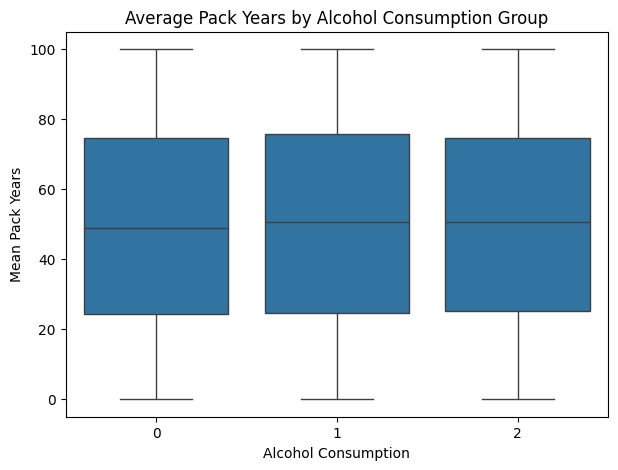

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#graph the results of the pack years by the alcohol consumption to be able to visualize it
plt.figure(figsize=(7,5))
sns.boxplot(x='alcohol_consumption', y='pack_years', data=df)
plt.title('Average Pack Years by Alcohol Consumption Group')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Mean Pack Years')
plt.show()


In [ ]:
# a simple contingency table to test lung_cancer vs secondhand smoke
contingency_table2 = pd.crosstab(df['secondhand_smoke_exposure'], df['lung_cancer'])
contingency_table2

lung_cancer,0,1
secondhand_smoke_exposure,,
0,8920,16013
1,6716,18351


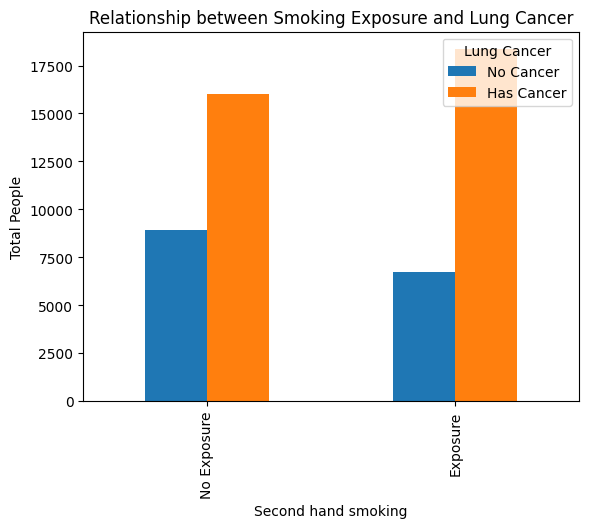

In [ ]:
import matplotlib.pyplot as plt
#plotting the results of the above
contingency_table2.plot(kind='bar')
plt.xlabel('Second hand smoking')
plt.ylabel('Total People')
plt.title('Relationship between Smoking Exposure and Lung Cancer')
plt.xticks([0, 1], ['No Exposure', 'Exposure'])
plt.legend(title='Lung Cancer', labels= ['No Cancer', 'Has Cancer'])
plt.show()

In [ ]:
import scipy
statistic, pvalue, dof, expected_freq = scipy.stats.contingency.chi2_contingency(contingency_table2)
print(f'P-value: {float(pvalue)}')

P-value: 5.3853664940314077e-104


## Conclusion 2



For the second test, we wanted to see if there is a correlation between alcohol exposure and smoking levels, denoted as pack_years. Since smoking is known to have an impact on lung cancer, we wanted to test if there is a correlation between alcohol consumption and pack years, as typically both of these lifestyle habits may correlate and cause an impact on lung cancer levels. Exploring this correlation may help us determine if alcohol consumption could contribute to smoking levels and, in turn lung cancer.

Our null hypothesis was that there was no difference in smoking levels (packs per day) between any of the alcohol consumption levels (none, moderate, heavy). The alternative hypothesis indicated that there was a difference in at least one consumption group as compared to the others.

After running the ANOVA test, we obtained a p-value of 0.015, which is less than 0.05. As a result, we reject the null hypothesis, indicating that there is a statistically significant relationship. This concludes that alcohol consumption does correlate with the smoking levels of a person. A further analysis using post hoc with Turkey HSD showed that moderate alcohol consumption had higher alcohol consumption compared to non-drinkers, as seen by the p value of 0.0125. This was done to find out which groups differ, and by how much they differ. However, none of these differences are very large or significant. In the box plot, we see that the means of moderate and heavy are slightly higher than that of the none group, as seen by the black line. However, the moderate mean is slightly higher than the heavy group mean, indicating that the biggest difference in mean is between "none" and "moderate". This is confirmed by the post-hoc test.

After completing this ANOVA test, a chi-squared test was done to investigate a correlation between secondhand smoke and lung cancer. The p-value of 5e104 indicates that we reject the null hypothesis and that secondhand smoke exposure has an impact on lung cancer. This is also illustrated by the graph, as there are more lung cancer instances amongst those who have the exposure as compared to those who don't.

## Statistical method 3: T-test: Age vs Lung Cancer


To understand the potential age based risk factors, we first need to establish whether age distribution differs between different diagnostic groups. We perform an independent t-test to examine whether age differs significantly between patients with and without lung cancer. Testing the hypothesis that mean ages are equal against the alternative that they differ, we separate the dataset by diagnosis status and calculate the t-statistic and p-value.


H0: People with and without lung cancer have the same mean age

HA: People with and without lung cancer have  different mean ages






In [ ]:
from scipy import stats

#Extract age data for two groups (people with and without cancer)
age_cancer = df[df['lung_cancer'] == 1]['age']
age_no_cancer = df[df['lung_cancer'] == 0]['age']

#Perform independent two sample t-test to compare mean ages between the two groups
stat, p_val = stats.ttest_ind(age_cancer, age_no_cancer)

print(f'P-value: {float(p_val)}')
print(f'T-stat: {float(stat)}')


P-value: 3.1883581525153105e-162
T-stat: 27.241939853277565


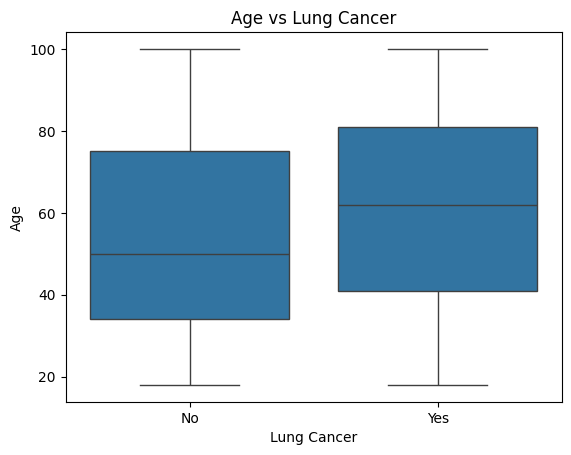

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='lung_cancer', y='age', data=df)
plt.title('Age vs Lung Cancer')
plt.xlabel('Lung Cancer')
plt.ylabel('Age')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Since the P-Value is less than 0.05, we reject the null hypothesis. We can conclude that people with and without lung cancer have different mean ages.

## Conclusion 3
For this test, we wanted to compare the mean ages of individuals with and without lung cancer to determine if age is associated with cancer occurrence. Age is an important factor to examine, as the likelihood of developing lung cancer is often associated with older age groups. We chose a two sample t-test for this analysis because we were comparing means of two different groups.

After running the t-test, we obtained a p-value  less than 0.05, leading us to reject the null hypothesis, which stated that the mean ages of both groups are equal.

We plotted a boxplot to show the difference between the median ages of the two groups. This boxplot suggests that age is associated with lung cancer status in this dataset. Patients diagnosed with lung cancer tend to be older than those without lung cancer.

Overall, this analysis suggests that age is significantly associated with lung cancer. While this does not imply direct causation, it highlights age as a potential contributing or correlated factor in lung cancer presence.

# Machine Learning Analysis

After completing a primary analysis of the data, we will now compare three different techniques of ML modeling to compare the recall and precision. By comparing and contrasting these different techniques, we hope to choose one that will best fit the purposes of lung cancer analysis and allow us to analyze the features correctly.

## MLP Classifier

First, we will train an MLP classifier on the data. We will do this by first splitting and normalizing our data, and then applying the MLP classifier on the training data. Our MLP classifier will use three hidden layers with 64 neurons for the first, 32 neurons for the second, and 16 neurons for the third. It will also use ReLU activation, an Adam optimizer, a learning rate initializer of .001, a batch size of 64, and a maximum epoch number of 500.

Accuracy: 0.7096

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.44      0.49      3118
           1       0.77      0.83      0.80      6882

    accuracy                           0.71     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.70      0.71      0.70     10000


Prediction Probabilities (first 5):
 [[7.86492747e-01 2.13507253e-01]
 [4.88571381e-01 5.11428619e-01]
 [2.90754107e-05 9.99970925e-01]
 [1.53485650e-01 8.46514350e-01]
 [2.48261218e-01 7.51738782e-01]]


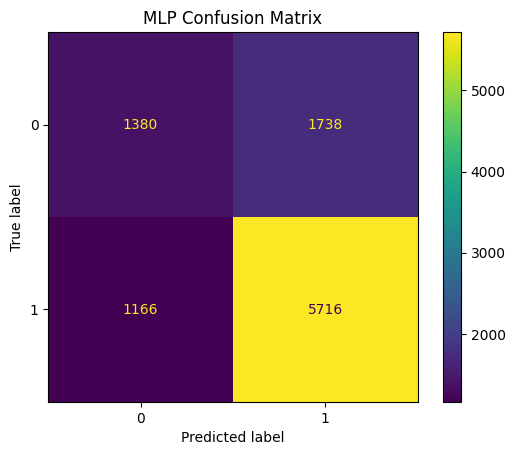

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
# Declaring X and y variables
X = df.drop(columns=['patient_id', 'lung_cancer'])
y = df['lung_cancer']
# Split the data using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform a MLP classifier on the data with 3 layer, relu activation, and an adam optimzier
mlp = MLPClassifier(hidden_layer_sizes=(64,32,16), activation='relu', solver='adam', learning_rate_init=.001, batch_size=64, max_iter=500)
# Train the data
mlp.fit(X_train_scaled, y_train)
# Get the predicted output
y_pred = mlp.predict(X_test_scaled)

# Print the accuracy and classification report to see how well the model performed
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print the first 5 prediction probabilities
probabilities = mlp.predict_proba(X_test_scaled)
print("\nPrediction Probabilities (first 5):\n", probabilities[:5])

# Display a confusion matrix
ConfusionMatrixDisplay.from_estimator(mlp, X_test_scaled, y_test)
plt.title('MLP Confusion Matrix')
plt.show()

## Random Forest Classifier

Next, we implement a Random Forest classifier to analyze how different features contribute to lung cancer prediction. We construct a preprocessing pipeline that standardizes numerical variables (age and pack-years) using z-score normalization via StandardScaler, and apply one-hot encoding to categorical variables. A Random Forest classifier with 100 trees is trained within this pipeline. Finally, we evaluate the model's performance using key metrics, including accuracy, precision, recall, and F1-score, with the positive class (lung cancer presence) identified as label 1.

In [ ]:
#Importing necessary modules

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
roc_auc_score, classification_report, RocCurveDisplay)

#Columns to be used for lung cancer prediction
feature_cols = ['age', 'gender', 'pack_years', 'radon_exposure',
       'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagnosis',
       'alcohol_consumption', 'family_history']

#Splitting data into X (features) and y (target variable)
X = df[feature_cols]
y = df['lung_cancer']

from sklearn import preprocessing
#Splitting data into training and testing tests (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#Numeric columns
numeric_cols = ['age', 'pack_years']

#Categorical columns
categorical_cols = ['gender', 'radon_exposure', 'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagnosis', 'family_history', 'alcohol_consumption']

#Standardizes numeric features
numeric_scaler = StandardScaler()
categorical_encoder = OneHotEncoder(sparse_output=False)

#Applying different preprocessing to columns with different types
preprocessing = ColumnTransformer(transformers=[('num', numeric_scaler, numeric_cols), ('cat', categorical_encoder, categorical_cols ),])

#Random forest
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)

rf_pipeline = Pipeline(steps = [('preprocessor', preprocessing), ('model', rf_classifier)])

rf_pipeline.fit(X_train, y_train)

#Function to evaluate the model

def evaluate_model_simple(pipeline, X_test, y_test):

    y_pred = pipeline.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, pos_label=1)}")
    print(f"Recall: {recall_score(y_test, y_pred, pos_label=1)}")
    print(f"F1-Score: {f1_score(y_test, y_pred, pos_label=1)}")

    return y_pred

y_pred_rf = evaluate_model_simple(rf_pipeline, X_test, y_test)

Accuracy: 0.6964
Precision: 0.7615541922290389
Recall: 0.8127455259711917
F1-Score: 0.7863175675675675


## Logistic Regression

Now we will implement logistic regression to predict if someone has lung cancer or not. The model requires a threshold value- in our case 0.3- about how much confidence is required in order to output a positive diagnosis. We decided on 0.3 because we value less false negatives, despite higher false positives.

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
# Features used for prediction
f = [
    'age',
    'smoking_intensity',
    'asbestos_exposure',
    'secondhand_smoke_exposure',
    'copd_diagnosis',
    'family_history',
    'radon_exposure',
]

X = df[f]
y = df['lung_cancer']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the regression model
model = sm.Logit(y_train, X_train)
results = model.fit()

pred_test = results.predict(X_test)
pred_test = (pred_test > 0.3).astype(int) # tweak number, lower decimal will boost recall at the cost of precision

#compute the precision and recall score
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)

#display
print("Precision:", precision)
print("Recall:", recall)
print("accuracy: ", accuracy_score(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))
print(df.columns.tolist())


Optimization terminated successfully.
         Current function value: 0.541594
         Iterations 6
Precision: 0.7065524088201484
Recall: 0.9824179017727405
accuracy:  0.7071
[[ 310 2808]
 [ 121 6761]]
['patient_id', 'age', 'gender', 'pack_years', 'radon_exposure', 'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagnosis', 'alcohol_consumption', 'family_history', 'lung_cancer', 'smoking_intensity']


## What machine learning technique should we use?
The machine learning technique we plan on using to do our analysis is regression. When doing testing, we first compared the recall values of both regression and classification. Our reports showed that regression had a higher recall value of 0.98. Models having a higher recall rate indicates better performance with false negatives, which is very important in cancer diagnosis. False negatives indicate that a patient has been marked with not having the disease, when in actuality they do. When comparing all three possible techniques, regression proved to have a higher recall as compared to Random Forest Classification and MLP Classifier.

We will now take a closer look at the Odds ratio of regression

## Odds Ratio for regression

In [ ]:
import numpy as np
import pandas as pd


params = results.params
odds_ratios = np.exp(params)


coef_df = pd.DataFrame({
    'feature': odds_ratios.index,
    'odds_ratio': odds_ratios.values,
    'coefficient': params.values
}).sort_values(by='odds_ratio', ascending=False)

print(coef_df)

                     feature  odds_ratio  coefficient
2          smoking_intensity    2.861809     1.051454
3          asbestos_exposure    2.209268     0.792661
5             copd_diagnosis    2.182372     0.780412
6             family_history    1.736935     0.552122
4  secondhand_smoke_exposure    1.613532     0.478426
7             radon_exposure    1.435002     0.361166
1                        age    1.012834     0.012752
0                      const    0.033832    -3.386339




Regression was used to find the odds ratio of the different features, in order to more accurately determine which feature has the greatest impact on lung cancer.

We first wanted to analyze how age affects lung cancer risks. The odds ratio for age was approximately 1.012, which indicates that older patients are 1.012 times more likely to have lung cancer.

We next wanted to analyze which exposure of radon, asbestos, and second hand smoke was the greatest contributor to lung cancer risk. When comparing the odds ratio of these features, asbestos exposure had the highest of 2.2, indicating that patients with asbestos exposure were 2.2 times more likely to have lung cancer as opposed to patients without asbestos exposure.

Another important question we wanted to answer through our analysis was which feature contributes most strongly to lung cancer risk.

As seen by the regression analysis, smoking intensity carries an odds ratio of 2.8, indicating that a level increase in smoking intensity increases a patient's likelihood of lung cancer by 2.8. This comparison is also seen by the graph of odds-ratios and features, showing that smoking intensity, asbestos exposure, and a COPD diagnosis carried the greatest risk in someone being diagnosed with lung cancer.


# Visualization

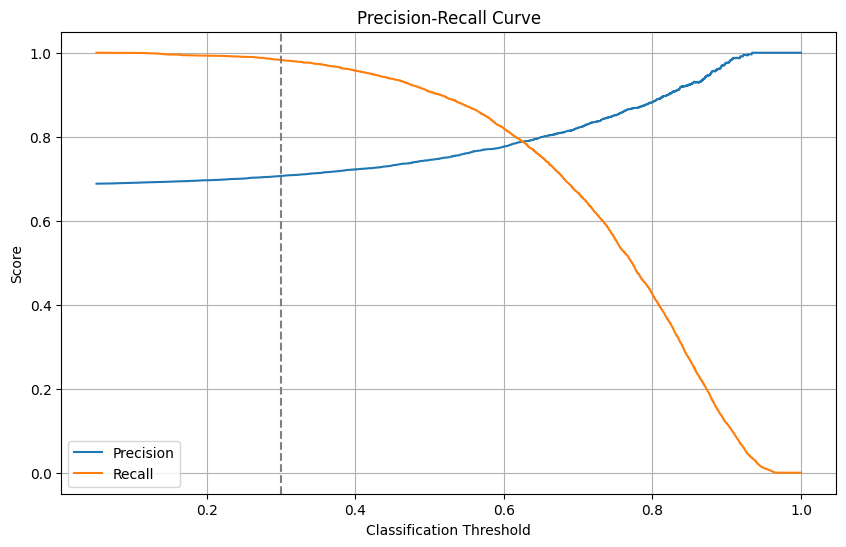

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
#predict probabilities
y_scores = results.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
# necessary to balance all 3 arrays
t = np.append(thresholds, 1)
plt.figure(figsize=(10, 6))
#plot precision and recall
plt.plot(t, precision, label='Precision')
plt.plot(t, recall, label='Recall')

# Marking our used threshold (0.3)
plt.axvline(x=0.3, color='gray', linestyle='--')
plt.ylabel("Score")
plt.xlabel('Classification Threshold')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

This graph represents the precision and recall values given different classification thresholds. The classification threshold is the value that determines whether the model will predict lung cancer or not, given different confidence levels. These two curves meet at approximately 0.65. Our model is predicting whether someone has lung cancer or not, and we believe that false negatives, defined as someone having lung cancer but being predicted not to, are more harmful than false positives, defined as someone being predicted to have lung cancer while being healthy. Given this, we decided to use a lower classification threshold, around 0.3, which would make our model less likely to improperly miss a diagnosis.

When we run this with 0.5 as the threshold, our model has a recall rate of 90%, and a precision rate of 74%. This is good, but we believe that limiting the amount of False Negatives is more positive, so if we reduce the amount to 0.3, the recall rate goes all the way to 98%, with just a reduction in 0.04 in the precision.

In this next section, we will visualize the odds ratio to gain a deeper understanding of how the features all compare

## Odds Ratio Plot for Regression

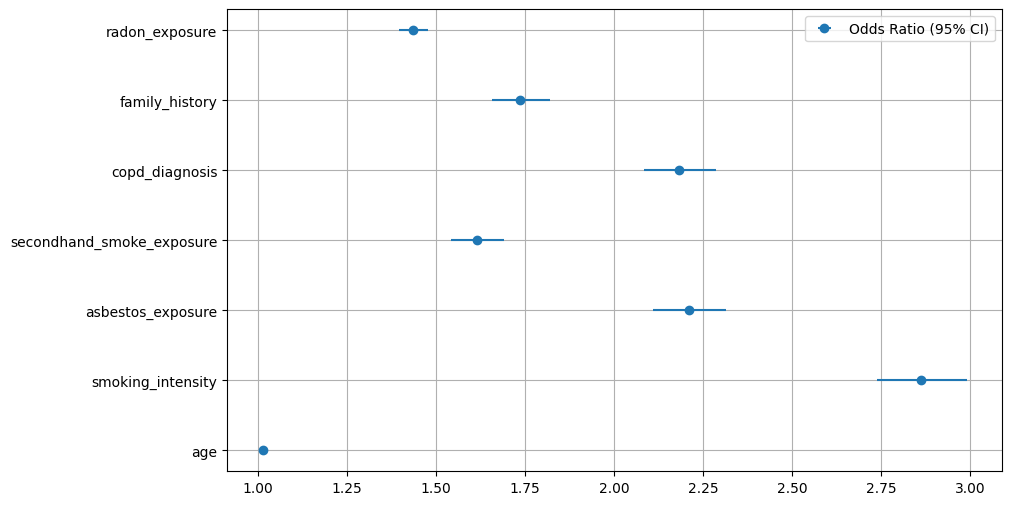

In [ ]:
#getting the confidence estimates
params = results.params
conf = results.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
# getting it as an odds ratio
conf['OR'] = np.exp(conf['OR'])
conf['2.5%'] = np.exp(conf['2.5%'])
conf['97.5%'] = np.exp(conf['97.5%'])
# we don't need the constant
conf = conf.drop('const')
plt.figure(figsize=(10, 6))
# plotting them all, with 95% confidence intervals
plt.errorbar(conf['OR'], conf.index, xerr=[conf['OR'] - conf['2.5%'], conf['97.5%'] - conf['OR']], fmt='o', label="Odds Ratio (95% CI)")
plt.grid(True)
plt.legend()
plt.show()


This forest plot shows that age has the weakest association with a person's chance of developing lung cancer. Smoking intensity has the highest immediate impact on a person's odds of developing lung cancer. A person's odds of developing lung cancer get multiplied by 2.86x for each level of intensity they go up by. For instance, this would mean going up from moderate to heavy smoking use would multiply your odds by 2.86x for developing lung cancer, if all other variables remain unchanged.
The horizontal bars represent the 95% confidence intervals for each odds ratio. These intervals show the range of values that are statistically plausible for the true effect. More narrow bars represent higher precision, while wider bars represent more uncertainty.

# Conclusion

Those who utilize this tutorial would find this very useful since this will help them make informed decisions on the actions they may need to take on their self-diagnosis. Knowing that early stage cancer detection is often low and can lead to a high mortality rate if not acted upon sooner means that patients need to be alert and must have a good understanding of their signs and symptoms. After knowing these signs and symptoms and then looking at or analyzing them, they can then make a better call on when they should see a doctor and get a better understanding and see if they can get an early diagnosis. The earlier the better.

Based on observations throughout our analysis and modeling, we can safely say that:





*   People with asbestos exposure are 2.2 times more likely to have lung cancer than those without the exposure
*   People with a high smoking intensity are 2.8 times more likely to have lung cancer when compared to medium smoking intensity.



These two observations clearly show a correlation between asbestos exposure and lung cancer and smoking and lung cancer. This suggests that patients who have asbestos exposure, lung cancer, or both should see a doctor more often about lung cancer than patients who don’t.




### Sources Used:

http://kaggle.com/datasets/mikeytracegod/lung-cancer-risk-dataset

https://www.uchicagomedicine.org/forefront/cancer-articles/8-lung-cancer-myths-debunked
